# Introduction

Here I'm testing the A2C on the taxi grid graph


### First test the optimal cab

In [16]:
import networkx as nx
import csv
import copy
import funcs as f
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent_taxi import Agent
from agent_taxi import PolicyCab
from taxi_environment import Env
from keras.utils import to_categorical
%matplotlib inline



#Environment
n = 4
G = f.make_G(n)
state_zero = np.array([1 if i == 0 else 0 for i in range(G.number_of_nodes())])
env = Env(G,state_zero)


#Agent
p = np.array([G.nodes[i]['prob'] for i in range(G.number_of_nodes())])
optimal_policy = f.find_optimal_policy(p,G)
model_cab = PolicyCab(optimal_policy,G)

taus = []
num_episodes, time_per_episode = 10, 10**4
for episode in range(num_episodes):
    
    state = state_zero
    while model_cab.active_time <= time_per_episode:
        action = model_cab.act(state)
        next_state, reward = env.step(action,model_cab)
        state = next_state
    tau = model_cab.find_tau()
    taus.append(tau)
    print '(episode, tau) = ' + str((episode,model_cab.find_tau()))
    model_cab.reset_clocks()
tau_optimal = np.mean(taus)
tau_optimal

(episode, tau) = (0, 0.15978402159784022)
(episode, tau) = (1, 0.15928407159284072)
(episode, tau) = (2, 0.1628837116288371)
(episode, tau) = (3, 0.15328467153284672)
(episode, tau) = (4, 0.1593840615938406)
(episode, tau) = (5, 0.15678432156784322)
(episode, tau) = (6, 0.15398460153984603)
(episode, tau) = (7, 0.15158484151584842)
(episode, tau) = (8, 0.1483851614838516)
(episode, tau) = (9, 0.15698430156984303)


0.1562343765623438

### Random cab

In [2]:
#Environment
n = 4
G = f.make_G(n)
state_zero = np.array([1 if i == 0 else 0 for i in range(G.number_of_nodes())])
env = Env(G,state_zero)


#Agent
p = np.array([G.nodes[i]['prob'] for i in range(G.number_of_nodes())])
optimal_policy = f.find_optimal_policy(p,G)
model_cab = PolicyCab(optimal_policy,G)


num_episodes, time_per_episode = 10, 10**4
taus = []
for episode in range(num_episodes):
    
    state = state_zero
    while model_cab.active_time <= time_per_episode:
        state_scalar = np.where(state==1)[0][0]
        neighbours = G[state_scalar].keys()
        action = np.random.choice(range(len(neighbours)))
        next_state, reward = env.step(action,model_cab)
        state = next_state
    tau = model_cab.find_tau()
    taus.append(tau)
    print '(episode, tau) = ' + str((episode,tau))
    model_cab.reset_clocks()
tau_random = np.mean(taus)

(episode, tau) = (0, 0.25607439256074394)
(episode, tau) = (1, 0.25877412258774124)
(episode, tau) = (2, 0.24447555244475552)
(episode, tau) = (3, 0.252974702529747)
(episode, tau) = (4, 0.24857514248575144)
(episode, tau) = (5, 0.2425757424257574)
(episode, tau) = (6, 0.251974802519748)
(episode, tau) = (7, 0.24017598240175983)
(episode, tau) = (8, 0.24847515248475152)
(episode, tau) = (9, 0.2702729727027297)


### RL agent

(episode, tau, score) = (50, 0.19, -2836)
(episode, tau, score) = (100, 0.24, -863)
(episode, tau, score) = (150, 0.24, 146)
(episode, tau, score) = (200, 0.11, 179)
(episode, tau, score) = (250, 0.13, 177)
(episode, tau, score) = (300, 0.13, 187)
(episode, tau, score) = (350, 0.16, 164)
(episode, tau, score) = (400, 0.24, -843)
(episode, tau, score) = (450, 0.17, 163)
(episode, tau, score) = (500, 0.24, 156)
(episode, tau, score) = (550, 0.3, 110)
(episode, tau, score) = (600, 0.28, 112)
(episode, tau, score) = (650, 0.28, 132)
(episode, tau, score) = (700, 0.26, 134)
(episode, tau, score) = (750, 0.15, 155)
(episode, tau, score) = (800, 0.2, 150)
(episode, tau, score) = (850, 0.21, 129)
(episode, tau, score) = (900, 0.22, 138)
(episode, tau, score) = (950, 0.11, 179)
(episode, tau, score) = (1000, 0.23, 137)
(episode, tau, score) = (1050, 0.17, 163)
(episode, tau, score) = (1100, 0.12, 168)
(episode, tau, score) = (1150, 0.12, 168)
(episode, tau, score) = (1200, 0.16, 154)
(episode, 

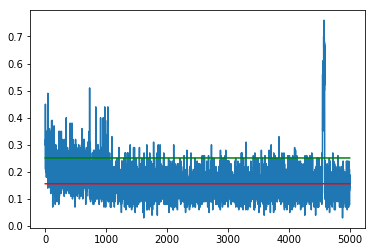

In [4]:
EPISODES = 5000


#Environment
n = 4
G = f.make_G(n)
state_zero = np.array([1 if i == 0 else 0 for i in range(G.number_of_nodes())])
env = Env(G,state_zero)
num_states = env.num_states
num_actions = env.num_actions

#Agent
lr = 0.001
gamma = 0.01
agent = Agent(num_states, num_actions, lr, gamma)
agent.memory_size = 1000

scores = []

for e in range(1,EPISODES+1):
    state = state_zero
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    while agent.active_time < 100:
        
        # env.render()
        action = agent.act(state)
        next_state, reward = env.step(action,agent)
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        
        #We only want to remember action taken when looking
        if agent.state == 'serving':
            pass
        else:
            agent.remember(state[0], action, 1.0*reward)
        state = next_state
    
    #Learn & print results
    agent.train_models()
    tau = agent.find_tau()
    scores.append(tau)
    agent.reset_clocks()
    if e % 50 == 0:
        print '(episode, tau, score) = ' + str((e,tau,reward_sum))

plt.plot(scores)
plt.plot([tau_random for i in scores],'g-')
plt.plot([tau_optimal for i in scores],'r-')
#np.savetxt('stats/scores_lunar_landing.txt',scores)

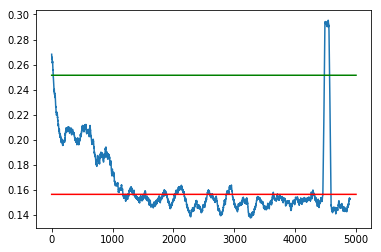

In [5]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

plt.plot(running_mean(scores,100))

plt.plot([tau_random for i in scores],'g-')
plt.plot([tau_optimal for i in scores],'r-')

In [9]:
policy = {}
for state_scalar in range(num_states):
    state_vec = np.array([[1 if i == state_scalar else 0 for i in range(G.number_of_nodes())]])
    action_probs = agent.actor.model.predict(state_vec)[0]
    print action_probs
    best_action = np.argmax(action_probs)
    neighbours = G[state_scalar].keys()
    policy[state_scalar] = neighbours[best_action]

[7.9753681e-04 9.9920171e-01 7.1521282e-07 3.7105987e-09]
[2.8446119e-04 9.9971527e-01 2.0573250e-07 4.3576603e-10]
[2.8855086e-04 9.9971145e-01 3.5582644e-08 8.9285523e-11]
[1.0412205e-03 9.9895763e-01 1.0774279e-06 6.7810553e-09]
[8.7331267e-05 9.9991262e-01 1.8618039e-08 1.4664457e-11]
[1.0904186e-02 9.8907286e-01 2.2097060e-05 7.7629204e-07]
[1.7311261e-04 9.9982685e-01 6.1228349e-08 9.4939674e-11]
[3.3893250e-04 9.9966085e-01 1.8733246e-07 4.7436532e-10]
[9.5454954e-05 9.9990451e-01 3.0471824e-08 3.0464221e-11]
[1.4988070e-03 9.9849653e-01 4.5887136e-06 3.3376629e-08]
[2.7631787e-03 9.9722821e-01 8.4392132e-06 9.4236142e-08]
[4.1244479e-05 9.9995875e-01 2.8684830e-09 1.2924710e-12]
[3.2598145e-02 9.6709365e-01 2.8146483e-04 2.6717425e-05]
[5.6059810e-04 9.9943906e-01 3.5721189e-07 1.4391965e-09]
[1.2103377e-03 9.9878877e-01 9.8941723e-07 6.7319865e-09]
[1.5677892e-03 9.9842680e-01 5.5277169e-06 4.2870941e-08]


In [14]:
deterministic_cab = PolicyCab(policy,G)

taus = []
num_episodes, time_per_episode = 10, 10**4
for episode in range(num_episodes):
    
    state = state_zero
    while deterministic_cab.active_time <= time_per_episode:
        action = deterministic_cab.act(state)
        next_state, reward = env.step(action,deterministic_cab)
        state = next_state
    tau = deterministic_cab.find_tau()
    taus.append(tau)
    print '(episode, tau) = ' + str((episode,deterministic_cab.find_tau()))
    deterministic_cab.reset_clocks()
np.mean(taus)

(episode, tau) = (0, 0.1494850514948505)
(episode, tau) = (1, 0.1401859814018598)
(episode, tau) = (2, 0.14158584141585842)
(episode, tau) = (3, 0.14678532146785322)
(episode, tau) = (4, 0.15098490150984903)
(episode, tau) = (5, 0.1504849515048495)
(episode, tau) = (6, 0.14828517148285172)
(episode, tau) = (7, 0.14628537146285372)
(episode, tau) = (8, 0.1541845815418458)
(episode, tau) = (9, 0.14258574142585742)


0.14708529147085292

Looks like my guy is doing slightly BETTER. Huh. I wonder how differnt their policies are.

In [11]:
optimal_policy

{0: 15,
 1: 15,
 2: 12,
 3: 13,
 4: 11,
 5: 9,
 6: 7,
 7: 9,
 8: 13,
 9: 13,
 10: 1,
 11: 10,
 12: 1,
 13: 9,
 14: 15,
 15: 1}

In [12]:
policy

{0: 3,
 1: 10,
 2: 4,
 3: 13,
 4: 11,
 5: 6,
 6: 5,
 7: 9,
 8: 1,
 9: 5,
 10: 11,
 11: 10,
 12: 2,
 13: 9,
 14: 15,
 15: 1}

Hmm. A lot different. This is making me think I should try this method on the real enviroment.